<a id='top'></a>

# Homework 2: Introduction to Probability and Simulation
***

**Name**: Muntaha Pasha

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 27**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 30 fair six-sided dice, with faces `{1,2,3,4,5,6}`.  <img style="float: right; width: 200px; padding: 3mm;" src="https://images-na.ssl-images-amazon.com/images/I/619NZnvxJaL._SX425_.jpg" alt="Drawing"/>
This bag also contains 17 fair eight-sided dice (faces `{1,2,3,4,5,6,7,8}`) and 3 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Six", "Eight" and "Twenty" (or S, E, and T, for short). In order to be sure that you are not distinguishing dice by their feel, you are required to wear crab claw gloves. After donning your gloves, you grab one die at random from the bag. 

Work the following problems by hand (or claw) unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

**PART A (Solutions):**

$P(R_7)$ = $P(R_7|S)P(S)$ + $P(R_7|E)P(E)$ + $P(R_7|T)P(T)$ = ($\frac{30}{50}$)$(\frac{0}{6})$ + ($\frac{17}{50}$) ($\frac{1}{8})$ + ($\frac{3}{50})$($\frac{1}{20})$
$=0.0455$

**Part B**: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die? 

**PART B (Solutions):**

$\frac{P(R_7|E)P(E)}{P(R_7|S)P(S) + P(R_7|E)P(E) + P(R_7|T)P(T)}$ = $\frac{0.0425}{0.0455}$ 
$= 0.934$

**Part C:**  Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

**PART C (Solutions):**

We know that in order for $R_7$ and $E$ to be Independant, they have to equal $0$.

$P(R_7 E)$ is ($\frac{17}{50}$)($\frac{1}{8}) = 0.0425$. 

We know that $0.0425 \neq 0$, therefore the events $R_7$ and $E$ are not independant. 

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or 8 you know you did *not* pick a Six-sided die, and if you roll a 9 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

**PART D (Solutions)**

First, we write it out as the following...

$$P(S|L_1) = \frac{P(L_1|S)*P(S)}{P(L_1)}$$

Then, we add in the other parts, like $E$, and $T$.

$$P(S|L_1) = \frac{P(L_1|S)P(S)}{(P(L_1|S)*P(S)) + (P(L_1|E)*P(E)) + (P(L_1|T)*P(T))}$$

We fill the probabilities in...

$$P(S|L_1) = \frac{(1)*(\frac{30}{50})}{(1*\frac{30}{50}) + (\frac{6}{8} * \frac{17}{50}) + (\frac{6}{20} * \frac{3}{50})}$$

When I calculate out the top, bottom, I get the following result.

$$P(S|L_1) = 0.687$$

So $\approx{0.687}$ is my final answer. $\checkmark$

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

**PART E (Solution):**

We want to show that...

$$P(S|L_n) = \frac{P(L_n|S)*P(S)}{P(L_n)}$$

So, we can write this out as the following...

$$P(S|L_n) = \frac{P(L_n|S)*P(S)}{(P(L_n|S)*P(S)) + (P(L_n|T)*P(T)) + (P(L_n|E)*P(E))}$$

We needed to take into accounts the $S$, $T$, and $E$ probabilities. We know what $P(S)$, $P(T)$, and $P(E)$ are. We can plug those into our formula.

$$P(S|L_n) = \frac{P(L_n|S)*(\frac{30}{50})}{(P(L_n|S)*(\frac{30}{50})) + (P(L_n|T)*(\frac{3}{50})) + (P(L_n|E)*(\frac{17}{50}))}$$

From above in Part D, we found the probabilities of the other components of this formula. They will be raised to the $n$.

$$P(S|L_n) = \frac{(1^n)*(\frac{30}{50})}{(1^n*\frac{30}{50}) + (\frac{6}{20}^n * \frac{3}{50}) + (\frac{6}{8}^n * \frac{17}{50})}$$

We have now calculated $P(S|L_n)$ in terms of $n$. $\checkmark$

In [2]:
def prob_six(n):
    #My result will mimic the calculations from the formula I did by hand above.
    result = (0.6/(0.6 + (0.06*(0.3**n) + (0.34*(0.75**n)))))
    #return the answer.
    return result

#Like in part D, to confirm it's right, I will use the test variable 1 
#and see if I get the same answer.
test_var=1
#Here I print the result.
print("Test Function on n=1 returns...{:.4f}".format(prob_six(test_var)))

Test Function on n=1 returns...0.6873


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [3]:
#Code to determine smallest value of n
#I will run several different test cases and see where I get the smallest value
#of n, which will give me a 95% chance or better.

#I declare a list here to hold different possible test cases.
test_vals=[2, 4, 6, 8, 9, 10]

#Now I'll run a for loop and test which value of n gets us to 95.
for i in test_vals:
    print("When n = {}".format(i))
    print("The probability is...{}".format(prob_six(i)))

When n = 2
The probability is...0.7531538316701186
When n = 4
The probability is...0.8473808781090273
When n = 6
The probability is...0.9083251148952147
When n = 8
The probability is...0.9463090613586363
When n = 9
The probability is...0.9591866491403235
When n = 10
The probability is...0.9690752747517923


Looks like from the test cases I run, when $n=9$, we get $95%$ chance that the die we grabbed is the 6 sided one. It's the minimum $n$ value that gives us that percentage. $\checkmark$.

***
<a id='p2'></a>
[Back to top](#top)


### [20 points] Problem 2

Oscar and Stella are two octopuses who are very excited to have both secured professorships in the Computer Science department at CU. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking. Eg. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Sources Used:**

1 - (Dictionaries) https://www.geeksforgeeks.org/python-dictionary/

2 - (Random Choice w/ Dict) https://stackoverflow.com/questions/4859292/how-to-get-a-random-value-in-python-dictionary

3 - (Loops Review) https://www.python-course.eu/python3_for_loop.php

**Part A**: Oscar is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, he wants to go to the brewing market to grab a coffee. That being said, Osacar has made a break through in his research and wants to follow up on it at the library, but he needs to run some errands too. Assume Oscar can do his errands at any location on the map. 

Compute by hand the probability that Oscar goes to the Brewing Market ($C$) in his first stop, makes a second stop at any location, then goes to the Library ($L$) third. 

**PART A (Solution):**

Oscar starts at $E$.
$C$ is Oscar's first stop.
From there, he can either go BACK to $E$, then $L$. 
OR, he can go to $H$, then $L$. So we need to compute two different probabilities.

$\underline{\text{Possible Paths}}$:

$\textbf{1) E -> C -> E -> L}$

$P(CE) = \frac{1}{3}$

$P(CEL) = \frac{1}{3} * \frac{1}{4}$

$\textbf{2) E -> C -> H -> L}$

$P(CH) = \frac{1}{3}$

$P(CHL) = \frac{1}{3} * \frac{1}{3}$

Now we add the paths together. $P(CEL) + P(CHL)$.

$\frac{1}{12} + \frac{1}{9}$

$= \frac{7}{36}$

$\approx{0.20}$



**Part B**: Stella is a competitive body-building octopus professor. This is quite the feat given her lack of bones!  Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Engineering Center ($E$). (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

**PART B(Solution):**

There are three different paths that fit this description.

$\textbf{Stella's Possible Paths: E -> G, or E -> R -> G, or E -> L -> G}$

Let's write out the probabilities for each of these...

$P(EG) = \frac{1}{4}$

$P(ERG) = \frac{1}{4} * \frac{1}{2}$

$P(ELG) = \frac{1}{4} * \frac{1}{4}$

Now we add those all together...

$= \frac{1}{4} + \frac{1}{8} + \frac{1}{16} = \frac{7}{16}$

$\approx{0.438}$


**Part C**: Suppose that Stella works late at the Engineering Center, while Oscar goes to the Gym.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**PART C (Solution):**

1) There are two ways they can meet on the first location visited. Either at $L$, or at $R$. $L$ and $R$ are the common meeting points from $E$ and $G$. 

$P(\text{They meet at L}) = P(L1 \cap l1)$

$P(L1)*P(l1) = \frac{1}{4}*\frac{1}{4} = \frac{1}{16}$

$P(\text{They meet at R}) = P(R1 \cap r1)$

$P(R1)*P(r1) = \frac{1}{4}*\frac{1}{4} = \frac{1}{16}$

Now we add those two Probabilities.

$\frac{1}{16} + \frac{1}{16}$

$ = \frac{1}{8} \checkmark$

2) We have different paths for each of the two.

$\textbf{Oscar's Path: G -> L -> H}$

$= \frac{1}{4}*\frac{1}{4} = \frac{1}{16}$

$\textbf{Stella's Path(s): E -> G -> H, or E -> L -> H, or E -> C -> H}$

$= (\frac{1}{4}*\frac{1}{4}) + (\frac{1}{4}*\frac{1}{4}) + (\frac{1}{4}*\frac{1}{3}) = \frac{5}{24}$

$= \frac{1}{16} * \frac{5}{24}$

$\approx{0.013} \checkmark$


**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [4]:
# First, we will make a dictionary of all the nodes, and what nodes they are connected to.
nodesGraph = {"H":["G","L","C"], # nodes connected to H
         "C":["H","L","E"],      # nodes connected to C
         "E":["C","L","G","R"],  # nodes connected to E
         "G":["H","L","E","R"],  # nodes connected to G
         "L":["E","H","G","C"],  # nodes connected to L
         "R":["G","E"]}          # nodes connected to R

'''
Now, we will make a tracker function, which takes in the start location, the number of steps,
and the graph dictionary which we just declared above. It will choose random nodes in connection
with the start node, and simulate the trials based off of that.
'''
def tracker(start, numOfsteps, graphDict):
    #Our starting location.
    startLoc = start
    #For an index in the given number of steps (Tells the code how many iterations to complete)
    for m in range(numOfsteps):
        #Update it to iterate over random connected nodes to that node.
        startLoc = np.random.choice(graphDict[startLoc])
    #return updated node.
    return startLoc

# Part A
#I chose to perform about 200,000 trials. Which is a lot! It is reasonable amount to get approximate data.
trials = 200000
'''
Here I call my tracker function, give it Engineering center as Oscar's start, and Library as the final dest.
I also specify it'll take about 3 moves. First to the brewing cafe, then back to Engineering OR to the Hill.
and then to the library, giving us a total of 3 steps. I iterate for the number of trials, and then divide
the result by the total trials taken.
'''
partA_Sim = np.array([tracker("E", 3, nodesGraph)=="L" for i in range(trials)]).sum()/trials
print("The Probability for Part A is... {:.3f}".format(partA_Sim))

The Probability for Part A is... 0.219


**CODE EXPLANATION / RESULTS**

Woo! I get about $0.21$ - $0.23$ for the results each time I run it. That's almost exactly what I got in part A, to some more precision, since I wrote my answer as $\approx{0.2}$. Though I've annotated in detailed how the code works, I'll explain it again. First step is to make the dictionary, holding all the nodes of the graph and their respective connections. So for instance, I add node $R$ for Reservoir as the key, then give it values $G$ for Gym, and $E$ for Engineeing, both of which are connected to it. After that, I make a function called tracker which essentually iterates over a series of potential paths from the start node to some finish node, which I detailed thoroughly in my function test variable called partA_Sim. I passed it Oscar's beginning, $E$, for Engineering, the number of steps it should take him to arrive, and then the final destination, $L$, the Library. I then sum that over 200,000 trials, and divide to find the mean probability. And it works out with the answer I got. $\checkmark$

In [5]:
# Part B

#Using the same function defined in part A, and the same graph, I write 3 new simulations.
#Iterating again over 200,000 trials. (Same vars from part A.)

#First, Path 1. Engineering -> Gym. # of steps should be 1, start is E, and end is G.
partB_Sim_path1 = np.array([tracker("E", 1, nodesGraph)=="G" for i in range(trials)]).sum()/trials

#Second, Path 2. Engineering -> Reservoir -> Gym. # of steps is 2, start is E, end is G.
#And also in this same case, we simulate Path 3. Engineering -> Library -> Gym.
partB_Sim_path2 = np.array([tracker("E", 2, nodesGraph)=="G" for i in range(trials)]).sum()/trials

#Now, add up the two probabilities of the trials, since its asking Stella could go in one step OR two.
tot_partB_Sim = partB_Sim_path1 + partB_Sim_path2
print("The Probability for Part B is... {:.3f}".format(tot_partB_Sim))

The Probability for Part B is... 0.439


**CODE EXPLANATION / RESULTS**

Again, this adds up perfectly! Here, I make two different trials, using the same number of simulations, the same graph, and the same tracker function. One of the simulations is Stella getting from the Engineering Center to the Gym in one move. The next simulation is taking 2 moves to get to the Gym from the Engineering Center. We need to add the probabilities of the both of those up, so I made a variable to hold the sum of those probabilities, then outputted my result! Again, averaged over 200,000 trials for accuracy, I get a probability of anywhere from $0.43$ - $0.44$, all of which correlate perfectly with my answer in Part B of $\approx{0.438}$. $\checkmark$

In [6]:
# Part C

#Part 1C -> They both run into eachother at same place on first stop.

#The first sim will be Stella's. Going from Engineering right to Library.
partC1_Sim_pathL_E = np.array([tracker("E", 1, nodesGraph)=="L" for i in range(trials)]).sum()/trials

#The second sim will be Oscar's. Going from the Gym right to the Library.
partC1_Sim_pathL_G = np.array([tracker("G", 1, nodesGraph)=="L" for i in range(trials)]).sum()/trials

#The third sim will be Stella's. Going from Engineering right to Reservoir.
partC1_Sim_pathR_E = np.array([tracker("E", 1, nodesGraph)=="R" for i in range(trials)]).sum()/trials

#The fourth sim will be Oscar's. Going from the Gym right to the Reservoir.
partC1_Sim_pathR_G = np.array([tracker("G", 1, nodesGraph)=="R" for i in range(trials)]).sum()/trials

'''
Now, we take the PRODUCT of the probabilities of the Library. We ADD that probability 
to the PRODUCT of the probabilities of the Reservoir. We add at the end because it could be 
Library OR Reservoir, but before adding those, we need to multiply the probabilities of Stella
and Oscar at those respective places.
'''
tot_partC1_Sim_1 = (partC1_Sim_pathL_E * partC1_Sim_pathL_G) + (partC1_Sim_pathR_E * partC1_Sim_pathR_G)
print("The Probability for the FIRST part of C is... {:.3f}".format(tot_partC1_Sim_1))

#Part 2C -> Probability they meet at Hill after 2 moves.

#The first sim will be Oscar's. Going from Gym to Library, to Hill. Only 2-step path from G to L.
partC2_Sim_pathH_G = np.array([tracker("G", 2, nodesGraph)=="H" for i in range(trials)]).sum()/trials

#The second sim will be Stella's. Going from the Engineering Center to another spot, to thr Hill.
#There are 3 different 2-step paths Stella can take, but we'll let this sim handle them all.
partC2_Sim_pathH_E = np.array([tracker("E", 2, nodesGraph)=="H" for i in range(trials)]).sum()/trials

'''
Now, we need to take the PRODUCT of these two trials, because they both need to be at the Hill in
2 moves, so we multiply what we got in each of these sims to get the total.
'''
tot_partC2_Sim_2 = partC2_Sim_pathH_G * partC2_Sim_pathH_E
print("The Probability for the SECOND part of C is... {:.3f}".format(tot_partC2_Sim_2))

The Probability for the FIRST part of C is... 0.126
The Probability for the SECOND part of C is... 0.013


**CODE EXPLANATION / RESULTS**

The results from part 1 and part 2 of C add up perfectly with the simulation I ran above! I will explain each seperately.

Part 1: I simulated Stella and Oscar running into eachother on the first stop from the Engineering and Gym, respectively. So the number of steps for each had to be 1, and there were only 2 viable options they could meet at the same place in one move (Library or Reservoir), so I simulated each of their chances of ending up at Library or Reservoir from their starting positions. Took the product of the probabilities at each possible location, then added them together. Just like above, I got $\frac{1}{8}$. $\checkmark$

Part 2: In this problem, they wanted to know how Stella or Oscar could end up at Hill in ONE, or TWO moves from their respective starting locations. Because Oscar was at the Gym, only one path from Gym to Hill in 2 steps makes sense, I made sure to input that in my variable called "partC2_Sim_pathH_G". For Stella, there were various paths that her sim would handle. I gave it the same number of steps (2), but her starting location was the Engineering. I ran the sim, and multiplied the respective probabilities to get an answer of $0.013$ which is exactly what I got when I did it by hand in part C. $\checkmark$

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Zach and Rachel are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Zach practicing his sweetest Jedi moves and trying to strike Rachel, then Rachel practicing *her* best moves and trying to strike Zach.
* If Zach manages to strike Rachel, then Zach is awarded a point, and similarly if Rachel manages to strike Zach, then Rachel is awarded a point.
* If a round ends in a tie, then Zach and Rachel proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $Z$ be the event that "Zach wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Zach successfully lands his lightsaber strikes with probability $p$, and Rachel lands her strikes with probability $q$.

**Part A**: The duel will continue until Zach or Rachel wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Zach has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

**SOURCES USED:**

1 - (Omega) https://www.countbayesie.com/blog/2015/8/30/picture-guide-to-probability-spaces

2 - (Law of Total Probability) https://en.wikipedia.org/wiki/Law_of_total_probability

3 - (Independant Events) https://www.wyzant.com/resources/lessons/math/statistics_and_probability/probability/further_concepts_in_probability

**PART A (Solution):**

We know that $\Omega$ is our Sample Space, which is the set of possible outcomes. Given this definition, we can find the possible outcomes...

$\Omega = \{M_{Z}H_{R}, \hspace{1mm} H_{Z}M_{R},  \hspace{1mm} H_{Z}H_{R}H_{Z}M_{Z}, \hspace{1mm} M_{Z}M_{R}M_{Z}H_{R}, \hspace{1mm} M_ZM_RH_ZM_R, \hspace{1mm} H_ZH_RM_ZH_R,  ... \}$

Where variables $M_{Z}$ and $M_{R}$ refer to the misses of Zach and Rachel, and variables $H_{Z}$ and $H_{R}$ refer to the hits of each, respectively. $\checkmark$

**Part B**: Determine $P(Z \mid E)$ in terms of $p$ and $q$.

**PART B (Solution):**

$$P(Z|E) = \frac{P(Z \cap E)}{P(E)}$$

$$P(Z|E) = \frac{P(\{ H_ZM_R\}}{P(\{H_ZM_R\},\{M_ZH_R\})}$$

1) Zach's probability is denoted $p$, Rachel's probability is denoted $q$. 

2) If Zach misses, then we know that $M_Z = 1-p$. Similarly, is Rachel misses, we get $M_R= 1-q$.

3) If Rachel hits, we get $H_R = q$, whereas if Zach hits we get $H_Z = p$.

Following this, the $\textbf{Law of Total Probability}$ can be used to expand the following as so.

$P(E) =  P(\{ M_ZH_R \}) + P(\{H_ZM_R \})$

This becomes...

$$= (q*(1-p)) + (p*(1-q)) = -2qp + p + q$$

The result above is the denominator part. The numerator, and fraction is as following...

$$= \frac{(p*(1-q))}{(q*(1-p)) + (p*(1-q))}$$

So our Final Answer after simplifying it is...

$$= \frac{(p*(1-q))}{p + q - 2qp} \hspace{5mm} \checkmark$$

**Part C**: Explain why events $C$ and $Z$ are independent. 

**PART C (Solution):**

In terms of a Probability Statement, we can write it as...

$P(Z|C) = P(Z)$

Beause we know that the probability of Zach winning (Z) and the duel continuing after the first round (C) have to be independant due to the fact that we know that each fight between Zach and Rachel occurs when they both have the same score, or a tie. If they have a tie on round 2, and still a tie on round 4, the likelihood of winning on the next round is still the same regardless of what round they're on. Therefore, they must be independant. $\checkmark$

**Part D**: Use the Law of Total Probability to show that $P(Z) = p(1-q) + (2pq - p - q +1) ~P(Z \mid C)$. 

**PART D (Solution):**

We know that...
$$P(Z) = (P(Z \mid E)*P(E)) + (P(Z \mid C)*P(C))$$
 
From the first part, we found out what our $P(Z \mid E)$ was, and we can use that here in the problem, and subsititute it into the equation.
 
$$P(Z) = (\frac{p(1-q)}{p + q -2pq}*P(E)) + (P(Z \mid C)*P(C))$$
 
Next, we know that...

$P(E) = P(\{M_ZH_R\} + P(\{H_ZM_R\} $

$= (1-p)q + p(1-q)$ which gives us $p+q-2pq$
 
Then, 

$P(Z) = P(\{M_ZM_R\} + P(\{H_ZH_R\}$

$= (1-p)(1-q) + pq$

$= pq + 1-q-p + pq$
 
$= 1 + 2pq-p-q$
 
Now, given all the variables we found, we can use them to plug back into our equation of $P(Z)$.

$P(Z) = (P(Z|E)*P(E)) + (P(Z|C)*P(C))$

$= ((\frac{p*(1-q)}{p+q-2pq})*(p+q-2pq)) + (P(Z|C)*(1 + 2pq-p-q))$

The $(p+q-2pq)$ end up canceling from the denominator with the multiplied one, and we finally end up with...

$P(Z) = p(1-q) + (P(Z|C)*(1 + 2pq-p-q))$ 

That is exactly what we were told to show. $\checkmark$

**Part E**: Use the fact from **Part B** that $P(Z \mid C) = P(Z)$ to determine $P(Z)$ in terms of $p$ and $q$.

**PART E (Solution):**

We know that $P(Z|C) = P(Z)$.

Similarly, in part D, we found what $P(Z)$ was. $P(Z) = p(1-q) + (P(Z|C)*(1 + 2pq-p-q))$.

Given these two pieces of information, we can subsitute in $P(Z)$ for $P(Z|C)$ since they are equivalent, and we end up getting...

$P(Z) = p(1-q) + (P(Z)*(1 + 2pq-p-q))$

We can then separate the $P(Z)$ and solve mathematically for it, having it on one side, and all our $p$'s and $q$'s on the other.

$P(Z)*(1 -(1 + 2pq-p-q)) = (p*(1-q))$

The 1's cancel out, so we get...

$P(Z)*(p+q-2pq) = (p*(1-q))$

$P(Z) = \frac{(p*(1-q))}{p+q-2pq}$ $\checkmark$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

If Zach, or Rachel do not win a round, then the next round starts regardless. Them tieing doesn't impact the next round. If Zach wins one round, it is going to be equivalent to the overall probability of Zach winning.

So, given that, we get that $P(Z) = P(Z|C)$ $\checkmark$

**Part G**: Explain the significance of the solution technique for $P(Z)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(Z)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

The significance of the solution technique in both parts for $P(Z)$ was due to $Z$ being $\textbf{independant}$ of $C$. It's only because these two variables were independant, that we were able to use this approach, and had the two not been, we couldn't have solved the problem this way. $\checkmark$

***
<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \\$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 3, 7, 15, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect either \\$50 or \\$250 or pay the bank \\$50.  There is always an equal probability associated with each of these possible cards.


- Squares 0, 10, and 20 do not trigger any action 


- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    

- If the player passes or lands on **GO** she collects \$200. 

- If the player lands on any other square not mentioned above, she pays the bank \$25. 


If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

**Sources Used:**

1 - (Range) https://www.w3schools.com/python/ref_func_range.asp

2 - (Operators) https://python-reference.readthedocs.io/en/latest/docs/operators/addition_assignment.html

In [7]:
def miniopoly_turn(state, cash):
    #First thing we will do is make our Bankrupcy case.
    if cash==0:
        #If there's no more cash, then just return the state, and cash.
        return state, cash
    firstRoll=np.random.choice(range(1,7)) #Rolling first die.
    secondRoll=np.random.choice(range(1,7)) #Rolling second die.
    #Now we address the Jail case.
    #Square 30 is jail, so we set our if statement to that.
    if state==30:
        #We need to check to see if we rolled doubles or not.
        if firstRoll==secondRoll:
            #If we did roll doubles, then our state is now the sum of 10, and the other rolls.
            state = 10+secondRoll+firstRoll
        else:
            #Now if it's not doubles, we need to pay back to the bank.
            #Our cash gets depleted by $20.
            cash += -20
            return state, cash
    #Now we handle the case if our state isn't 30, a.k.a, not in Jail.
    else:
    #If this is the case, then our state is just the sum of the current state, and the rolls.
        state = state + secondRoll + firstRoll    
        
    #Now we handle the GO square, and the player gets $200.
    #If square is 40 or more, then it's a GO square, so we get a surplus of cash.
    if state >= 40:
        #Add cash.
        cash += 200
        #Subtract 40 from state.
        state = state-40
    
    #I declared an arry to hold the potential values we can get.
    vals = np.array([50, 250, -50])
    
    #Now we take care of drawing from the cards, so we put in the values.
    if state in [3,7,15,22,33,36]:
        #We have to choose from our dollar values.
        #-50 is for the 50 to the bank.
        cash = cash + np.random.choice(vals)
        return state, cash 
    
    #This is the final Jail case down here.
    if state==30:
        return state, cash 
    if state in list([0,10,20]):
        return state, cash
    else:
        # otherwise...
        cash += -state
        return state, cash

**Part B**: Use your function from **Part A** to Simulate at least 10000 25-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game.

In [8]:
#Part B Simulation
def gameSimulator():
    #Variable to hold our state
    state_s= 0
    #Variable to hold the cash
    cash_c=200
    #Iterate over 25 turns...
    for i in range(25):
        #Throw both the state and cash variables into the monopoly function above.
        state_s,cash_c = miniopoly_turn(state_s,cash_c)
        #If the cash is 0, then just return 0
        if cash_c <= 0:
            return 0
        #Otherwise, return our cash.
    return cash_c

numGames = 10000 #Variable dictating how many games there are.
totalCash = np.zeros(numGames) #Total cash to hold the total number of money in the games
#Here we iterate over 100,000 games.
for i in range(numGames):
    #Our total cash should hold each results of the simulation.
    totalCash[i] = gameSimulator()

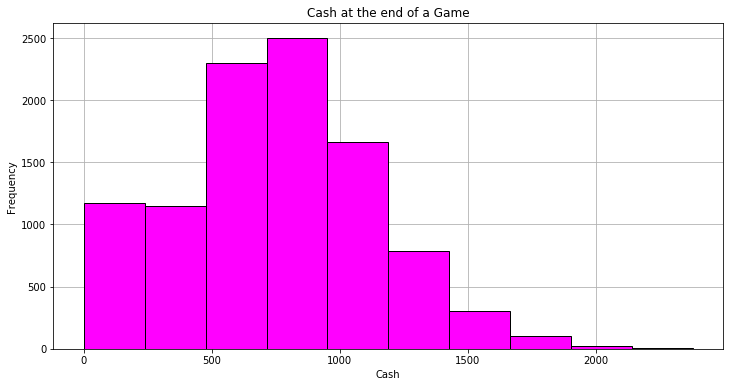

In [9]:
x = pd.Series(totalCash)
fig, ax = plt.subplots(figsize=(12,6))
x.hist(edgecolor='black', facecolor="magenta", ax=ax)
ax.set_title("Cash at the end of a Game")
ax.set_xlabel("Cash")
ax.set_ylabel("Frequency")
ax.set_axisbelow(True)

**QUICK NOTE!**

The following cells take a while to compile because we are running so many simulations.

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a game that only lasts 25 turns.

In [10]:
#Estimation of probability of going bankrupt

#We iterate over 10,000 trials of the game.
numGames = 10000
#Variable for bankrupcy.
bankrupcy=0
#Iterate over the number of games played...
for i in range(numGames):
    #If the end result final cash comes out as 0, then update bankrupcy variable.
    if gameSimulator()==0:
        bankrupcy += 1
#To find the probability, take the total amount of times bankrupcy occurred over the number of games played, and voila.
x = bankrupcy/numGames

print("The Probability a player goes bankrupt in a game that lasts 25 turns only is...{}".format(x))

The Probability a player goes bankrupt in a game that lasts 25 turns only is...0.0809


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a 25 turn game  _given_ that they went to **Jail** at least twice.  Is a player more or less likely to go bankrupt if they've been to **Jail** twice?  

**PART D (Solution):**

Based off the code I wrote below, it seems the player is LESS likely to be bankrupt after two times in Jail! Here I'm getting a probability of about $3$% likelyhood that they'd be bankrupt after being in jail twice. It's really interesting to see such a low probability!

In [11]:
#Estimate probability of going bankrupt given jail at least twice.
#So, I will write a function called jail twice, to simulate what'll happen to the cash if you've been in jail two times.
def jail_twice():
    #Variable time! We will have a variable to mark if they have gone to Jail.
    goneJail = 0
    #Variables for the state, and for the cash.
    state = 0
    cash = 200
    #Number of turns is 25, and we will pass that into our for loop.
    turns = 25
    #Iterate over the number of turns.
    for i in range(turns):
        #Throw in the state, cash, and simulate a miniopoly game with it.
        state, cash = miniopoly_turn(state, cash)
        #When the state is 30, we are in jail, so we want to update our jail variable to 1, signifying we went once.
        if state == 30:
            #Here we update our variable.
            goneJail = goneJail + 1
        #Now we look at bankrupcy.
        if cash <= 0:
            #If their cash is 0 (bankrupcy) AND they've been to jail twice, as it's asking in the problem...
            if goneJail == 2:
                #Then return 0.
                return 0
            #Otherwise, keep going.
            else:
                return jail_twice()
    #Now outside the loop, if you've been to jail twice, return the cash amount or just again, run it.
    if goneJail==2:
        return cash
    else:
        return jail_twice()

In [12]:
#We iterate over 10,000 trials of the game.
numGames = 10000
#Variable for bankrupcy.
bankrupcy=0
#Iterate over the number of games played...
for i in range(numGames):
    #If the end result final cash comes out as 0, then update bankrupcy variable.
    if jail_twice()==0:
        #Update our variable
        bankrupcy+=1
#and again, take the average of times bankrupt over the num of games to find the probability...
result_2 = (bankrupcy/numGames)
print("The probability of being bankrupt in a 25 turn game after having gone to jail twice is...{}".format(result_2))

The probability of being bankrupt in a 25 turn game after having gone to jail twice is...0.0283


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least twice, given that the player went bankrupt in the first 25 turns.

**Sources Used:**

1 - (Bayes Theorem) https://brilliant.org/wiki/bayes-theorem/

In [13]:
#Estimate probability of going to jail twice, given bankruptcy in first 25 turns.

def revised_jail_twice():
    #Variable time! We will have a variable to mark if they have gone to Jail.
    goneJail = 0
    #Variables for the state, and for the cash.
    state = 0
    cash = 200
    #Number of turns is 25, and we will pass that into our for loop.
    turns = 25
    #Iterate over the number of turns.
    for i in range(turns):
        #Throw in the state, cash, and simulate a miniopoly game with it.
        state, cash = miniopoly_turn(state, cash)
        #When the state is 30, we are in jail, so we want to update our jail variable to 1, signifying we went once.
        if state == 30:
            #Here we update our variable.
            goneJail = goneJail + 1
            #they've been to jail twice, as it's asking in the problem...
            if goneJail == 2:
                #Then return 1
                return 1
            #Now look at bankrupcy, if true, then just return 0
            if cash <= 0:
                return 0
    return 0

In [14]:
#We iterate over 10,000 trials of the game.
numGames = 10000
#Variable for jail.
jailVar=0
#Iterate over the number of games played...
for i in range(numGames):
    #If the end result final cash comes out as 0, then update bankrupcy variable.
    if revised_jail_twice()==1:
        #Update our variable
        jailVar+=1
#and again, take the division of jailVar over the num of games to find the probability...
result_3 = (jailVar/numGames)
print("The probability of having gone to jail twice given plaer was bankrupt in 1st 25 turns is...{}".format(result_3))

The probability of having gone to jail twice given plaer was bankrupt in 1st 25 turns is...0.4065


**PART E (Solution):**

We can use Bayes' Theorem in the following way...

We'll use $P(Jail)$ to represent probability of jail, and $P(Bankrupt)$ as the probability of being Bankrupt.

We know $P(Bankrupt) \approx{0.08}$ from part $C$ (code).

We also know $P(Jail) \approx{0.41}$ from part $E$ (code).

So that means $P(Bankrupt | Jail) \approx{0.03}$.

Bayes theorem is written as the following for this problem...

$$P(Jail | Bankrupt) = \frac{P(Bankrupt | Jail)*P(Jail)}{P(Bankrupt)}$$

We know all the variables, so we can plug them in and solve for $P(Jail | Bankrupt)$.

$$P(Jail | Bankrupt) = \frac{(0.03)(0.41)}{(0.08)} \approx{0.15}$$

So, $P(Jail | Bankrupt) \approx{0.15}$. $\checkmark$

***
<a id='p5'></a>
[Back to top](#top)

### [15 points] Problem 5

To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *claim* that has a 10% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *claim* is true is 50%
    2) The probability that they incorrectly *find* an important result given that their *claim* is false is 5%

If they *find* an important result they are published.  What is the probability that their *claim* was true, given that they were published?

**PROBLEM 5 (Solution):**

We know that the Probability of the Claim being true is...

$P(C_{true}) = 0.1$

So given that, we then know...

$P(C_{false}) = 0.9$

Then, the probability of correctly finding an important result with their claim is...

$P(CorrectClaim_{true}) = 0.5$

And the opposite, we know if it's False, it'll be $100$%$-5$%, so that's $95$%.

$P(CorrectClaim_{false}) = 0.95$

So, we can find the Probability of being Correct like so.

$P(Correct) = P(CorrectClaim_{true})P(C_{true}) + P(CorrectClaim_{false})P(C_{false})$

$P(Correct) = (0.1)(0.5) + (0.9)(0.95)$

$P(Correct) \approx{0.91}$

Now we can find the Probability of being Correct and having the Claim True like so.

$$P(CorrectClaim_{true}) = \frac{P(CorrectClaim_{true})P(C_{true})}{P(Correct)}$$


$$P(CorrectClaim_{true}) = \frac{(0.1)(0.5)}{(0.91)}$$

So the probability that their claim was true given that they were published comes down to $\approx{0.06}$. $\checkmark$